<a href="https://colab.research.google.com/github/lazuardy97/compiler/blob/master/DFT_%26_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
#DFT
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [22]:
def fft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    if N % 2 > 0:
        raise ValueError("must be a power of 2")
    elif N <= 2:
        return dft(x)
    else:
        X_even = fft(x[::2])
        X_odd = fft(x[1::2])
        terms = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + terms[:int(N/2)] * X_odd,
                               X_even + terms[int(N/2):] * X_odd])

In [23]:
x = np.random.random(1024)
np.allclose(dft(x), np.fft.fft(x))

True

In [24]:
y = np.random.random(1024)
np.allclose(fft(y), np.fft.fft(y))

True

In [25]:
%timeit dft(x)
%timeit np.fft.fft(x)

10 loops, best of 5: 126 ms per loop
The slowest run took 47.49 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 15.8 µs per loop


1024
0.3038766384124756
2048
0.5861523151397705
4096
1.6793227195739746
8192
6.187303066253662
16384
19.723909616470337


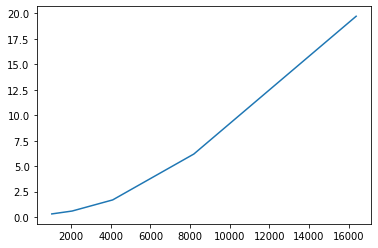

In [31]:
import time

i = 0
input_dft = [1, 2, 3, 4, 5]
list_time_dft = [0.0, 0.0, 0.0, 0.0, 0.0]

for n in range(10, 15):
  print(pow(2, n))
  input_dft[i] = pow(2, n)
  x = np.random.random(pow(2, n))

  # start test
  start_test = time.time()

  dft(x)

  # end test
  end_test = time.time()

  list_time_dft[i] = end_test - start_test
  print(list_time_dft[i])
  i+=1


#GRAFIK DFT
xpoints = input_dft
ypoints = list_time_dft

plt.plot(xpoints, ypoints)
plt.show()

1024
0.013516664505004883
2048
0.027007579803466797
4096
0.054904937744140625
8192
0.1133263111114502
16384


No handles with labels found to put in legend.


0.24943041801452637


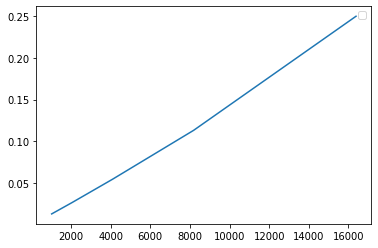

In [27]:
import time

i = 0
input_fft = [0, 0, 0, 0, 0]
list_time_fft = [0.0, 0.0, 0.0, 0.0, 0.0]

for n in range(10, 15):
  print(pow(2, n))
  input_fft[i] = pow(2, n)
  x = np.random.random(pow(2, n))

  # start test
  start_test = time.time()

  fft(x)

  # end test
  end_test = time.time()

  list_time_fft[i] = end_test - start_test
  print(list_time_fft[i])
  i+=1


#GRAFIK FFT
xpoints = input_fft
ypoints = list_time_fft

plt.plot(xpoints, ypoints)
plt.show()

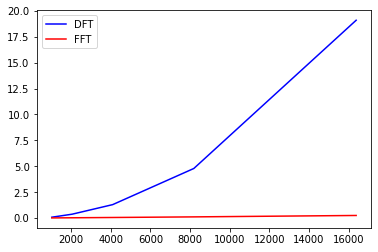

In [28]:
xpoints = input_dft

plt.plot(xpoints, list_time_dft, 'b', label='DFT')
plt.plot(xpoints, list_time_fft, 'r', label='FFT')
plt.legend()